In [12]:
import scanpy as sc
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
from scipy.stats import pearsonr
from adjustText import adjust_text
import sys
import os
sys.path.append(os.path.abspath('../'))
from DE_analysis_utils import get_DE_results_long

In [3]:
datadir = '../../../../3_expts/processed_data'
adata_de = ad.read_h5ad(datadir + '/CD4i_final/DE_results_all_confounders/CD4i_final.merged_DE_results_corrected.h5ad', backed=False)
de_by_guide = pd.read_csv('./results/DE_by_guide.correlation_results.csv', index_col=0)
donor_robustness_summary = pd.read_csv('./results/Stim8hr_debyguidegenes_donor_robustness_summary.csv', index_col=0)
de_donor_robustness = ad.read_h5ad(datadir + '/CD4i_final/CD4i_final.Stim8hr.DE_donor_robustness.h5ad', backed=False)

In [10]:
de_donor_robustness.layers['zscore'] = de_donor_robustness.layers['log_fc'] / de_donor_robustness.layers['lfcSE']
de_donor_robustness.layers['zscore'][np.where(de_donor_robustness.layers['zscore'] > 50)] = 50
de_donor_robustness.X = np.nan_to_num(de_donor_robustness.layers['zscore'], 0)

In [98]:
reg_all = ['MEN1', 'ELOB', 'FBRS', 'SGF29', 'ATP2A2', 'MED24', 'GATA3', 'CYB5R4', 'STAT3', 'APC', 'NFKB2', 'ATXN7L3', 'ELP2', 'PPCS']
gene = ['IFNG']

In [99]:
donor_pairs = de_donor_robustness.obs['donor_pair'].unique()

In [100]:
df_reg_gene = pd.DataFrame()
for donor_pair in donor_pairs:
    temp_df = get_DE_results_long(de_donor_robustness[de_donor_robustness.obs['donor_pair']==donor_pair], targets=de_donor_robustness.obs['target_contrast_gene_name'].tolist(), genes = gene)
    temp_df['donor_pair'] = donor_pair
    df_reg_gene = pd.concat([df_reg_gene, temp_df])
df_reg_gene = df_reg_gene.reset_index(drop=True)

/var/folders/qq/j023xkr13nxfrw65dx2bqwd00000gp/T/ipykernel_2573/1968415089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(np.sort(df_reg_gene.groupby('target_contrast_gene_name')['zscore'].std()/df_reg_gene.groupby('target_contrast_gene_name')['zscore'].mean()), '.')


(-10.0, 10.0)

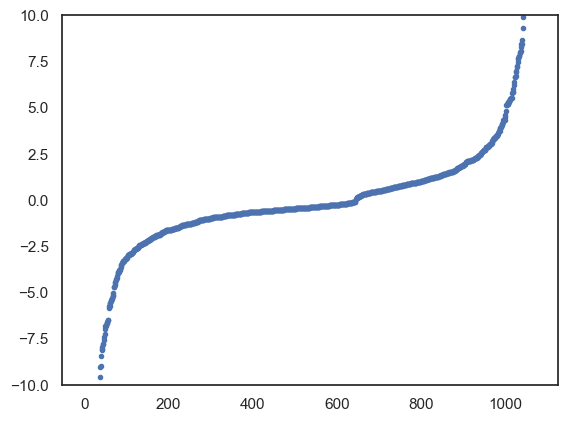

In [101]:
plt.plot(np.sort(df_reg_gene.groupby('target_contrast_gene_name')['zscore'].std()/df_reg_gene.groupby('target_contrast_gene_name')['zscore'].mean()), '.')
plt.ylim([-10,10])

### Set coefficient of variation < 1

In [106]:
reg = 'NFKB2'
df_reg_gene[df_reg_gene['target_contrast_gene_name']==reg].zscore.std()/df_reg_gene[df_reg_gene['target_contrast_gene_name']==reg].zscore.mean()

1.2967105061152469

In [107]:
donor_robustness_summary

,target_name,donor_correlation_mean,donor_correlation_min,target_contrast,condition,n_cells_target,n_up_genes,n_down_genes,n_total_de_genes,ontarget_effect_size,ontarget_significant,baseMean,offtarget_flag,n_total_genes_category,ontarget_effect_category
0,A2M,0.170529,-0.002503,ENSG00000175899,Stim8hr,292.0,67,97,164,0.000000,False,NaN,False,>10 DE genes,no on-target KD
1,AAGAB,0.857296,0.814893,ENSG00000103591,Stim8hr,535.0,27,7,34,-19.262203,True,85.633443,False,>10 DE genes,on-target KD
2,ABCA5,0.101364,0.062939,ENSG00000154265,Stim8hr,784.0,28,5,33,-9.061948,True,12.260059,False,>10 DE genes,on-target KD
3,ABCC1,0.384054,0.145905,ENSG00000103222,Stim8hr,578.0,33,21,54,-25.208906,True,167.935163,False,>10 DE genes,on-target KD
4,ABHD13,0.083223,0.009890,ENSG00000139826,Stim8hr,640.0,124,70,194,-12.601002,True,24.611966,True,>10 DE genes,on-target KD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,ZNF790,0.354509,-0.064474,ENSG00000197863,Stim8hr,580.0,262,15,277,-4.258542,True,4.485648,False,>10 DE genes,on-target KD
1069,ZNF829,0.153768,0.055918,ENSG00000185869,Stim8hr,1362.0,100,16,116,-5.524440,True,2.580546,True,>10 DE genes,on-target KD
1070,ZNF92,0.010876,-0.123030,ENSG00000146757,Stim8hr,870.0,211,131,342,-13.126263,True,22.227434,False,>10 DE genes,on-target KD
1071,ZRSR2,0.461814,0.379767,ENSG00000169249,Stim8hr,196.0,218,206,424,-6.015884,True,21.557953,False,>10 DE genes,on-target KD


In [71]:
df_reg_gene[df_reg_gene['target_contrast_gene_name']==reg].zscore.std()

nan

In [72]:
df_reg_gene[df_reg_gene['target_contrast_gene_name']==reg].zscore.mean()

nan

In [23]:
adata_de

AnnData object with n_obs × n_vars = 33983 × 13959
    obs: 'target_contrast_gene_name', 'culture_condition', 'target_contrast', 'chunk', 'n_cells_target', 'target_contrast_corrected', 'target_contrast_gene_name_corrected'
    var: 'gene_ids', 'gene_name'
    layers: 'adj_p_value', 'baseMean', 'lfcSE', 'log_fc', 'p_value'

In [ ]:
['MEN1', 'ELOB', 'FBRS', 'SGF29', 'ATP2A2', 'MED24', 'GATA3', 'CYB5R4', 'STAT3', 'APC', 'NFKB2', 'ATXN7L3', 'ELP2', 'PPCS']

In [4]:
de_donor_robustness

AnnData object with n_obs × n_vars = 6438 × 13948
    obs: 'target_contrast_gene_name', 'culture_condition', 'target_contrast', 'donor_pair', 'chunk'
    var: 'gene_ids', 'gene_name'
    layers: 'adj_p_value', 'baseMean', 'lfcSE', 'log_fc', 'p_value'

In [6]:
donor_robustness_summary

,target_name,donor_correlation_mean,donor_correlation_min,target_contrast,condition,n_cells_target,n_up_genes,n_down_genes,n_total_de_genes,ontarget_effect_size,ontarget_significant,baseMean,offtarget_flag,n_total_genes_category,ontarget_effect_category
0,A2M,0.170529,-0.002503,ENSG00000175899,Stim8hr,292.0,67,97,164,0.000000,False,NaN,False,>10 DE genes,no on-target KD
1,AAGAB,0.857296,0.814893,ENSG00000103591,Stim8hr,535.0,27,7,34,-19.262203,True,85.633443,False,>10 DE genes,on-target KD
2,ABCA5,0.101364,0.062939,ENSG00000154265,Stim8hr,784.0,28,5,33,-9.061948,True,12.260059,False,>10 DE genes,on-target KD
3,ABCC1,0.384054,0.145905,ENSG00000103222,Stim8hr,578.0,33,21,54,-25.208906,True,167.935163,False,>10 DE genes,on-target KD
4,ABHD13,0.083223,0.009890,ENSG00000139826,Stim8hr,640.0,124,70,194,-12.601002,True,24.611966,True,>10 DE genes,on-target KD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,ZNF790,0.354509,-0.064474,ENSG00000197863,Stim8hr,580.0,262,15,277,-4.258542,True,4.485648,False,>10 DE genes,on-target KD
1069,ZNF829,0.153768,0.055918,ENSG00000185869,Stim8hr,1362.0,100,16,116,-5.524440,True,2.580546,True,>10 DE genes,on-target KD
1070,ZNF92,0.010876,-0.123030,ENSG00000146757,Stim8hr,870.0,211,131,342,-13.126263,True,22.227434,False,>10 DE genes,on-target KD
1071,ZRSR2,0.461814,0.379767,ENSG00000169249,Stim8hr,196.0,218,206,424,-6.015884,True,21.557953,False,>10 DE genes,on-target KD


In [22]:
reg_all = ['MEN1', 'ELOB', 'FBRS', 'SGF29', 'ATP2A2', 'MED24', 'GATA3', 'CYB5R4', 'STAT3', 'APC', 'NFKB2', 'ATXN7L3', 'ELP2', 'PPCS']
de_by_guide[de_by_guide['target'].isin(reg_all)]

,target,correlation,correlation_ceiling,n_signif,culture_condition
34,APC,0.493666,0.836564,266,Rest
53,ATP2A2,0.756076,0.867583,2677,Rest
64,ATXN7L3,0.833461,0.772173,80,Rest
186,CYB5R4,0.863770,0.898027,66,Rest
247,ELOB,0.524125,0.094985,671,Rest
251,ELP2,0.761241,0.853401,273,Rest
285,FBRS,0.535251,0.553120,4,Rest
308,GATA3,0.818933,0.897474,152,Rest
463,MED24,0.801351,0.915865,140,Rest
532,NFKB2,0.176900,0.884378,76,Rest


In [38]:
target_gene_list = set(de_by_guide[(de_by_guide['culture_condition']=='Stim8hr')&(de_by_guide['correlation']>0.2)]['target'])
target_gene_list = target_gene_list & set(donor_robustness_summary[donor_robustness_summary['donor_correlation_min']>0.1]['target_name'])
target_gene_list = list(target_gene_list)

In [39]:
keep = (adata_de.obs['culture_condition']=='Stim8hr') & (adata_de.obs['target_contrast_gene_name'].isin(target_gene_list))
adata_de_filtered = adata_de[keep].to_memory()

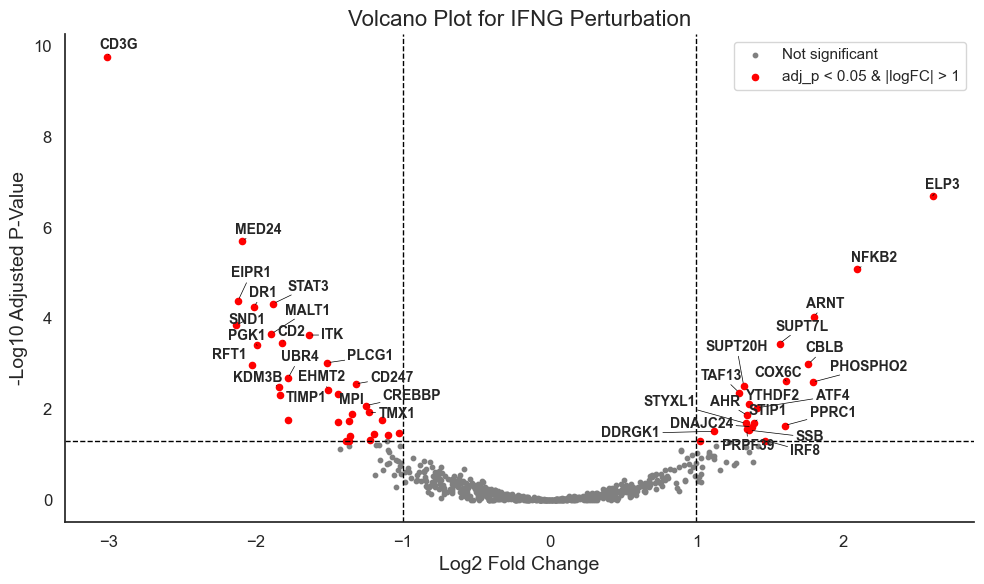

In [104]:
target_gene = 'IFNG'
adj_p_thres = 0.05
log_fc_thres = 1

target_idx = np.where(adata_de_filtered.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de_filtered[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de_filtered[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de_filtered.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [4]:
filtered_gene_condition = de_by_guide[(de_by_guide['correlation']>0.2)&(de_by_guide['culture_condition']=='Stim8hr')]['gene_condition']
adata_de = adata_de[adata_de.obs['gene_condition'].isin(filtered_gene_condition)].copy()

In [165]:
annot_genes

['MEN1',
 'ELOB',
 'FBRS',
 'SGF29',
 'ATXN7L3',
 'ATP2A2',
 'MED24',
 'GATA3',
 'CYB5R4',
 'ELP2',
 'PPCS']

In [27]:
annot_genes = ['MEN1', 'ELOB', 'FBRS', 'SGF29', 'ATXN7L3', 'ATP2A2', 'MED24', 'GATA3', 'CYB5R4']#, 'ELP2', 'PPCS']

In [132]:
de_by_guide[(de_by_guide.target.isin(annot_genes))&(de_by_guide.culture_condition=='Stim8hr')]

,target,correlation,correlation_ceiling,n_signif,culture_condition,gene_condition
1022,ATP2A2,0.649677,0.844653,2737,Stim8hr,ATP2A2_Stim8hr
1032,ATXN7L3,0.823862,0.721163,545,Stim8hr,ATXN7L3_Stim8hr
1169,CYB5R4,0.749643,0.882319,875,Stim8hr,CYB5R4_Stim8hr
1193,DHPS,0.571475,0.861785,160,Stim8hr,DHPS_Stim8hr
1244,ELOB,0.411224,NaN,1968,Stim8hr,ELOB_Stim8hr
1248,ELP2,0.657706,0.875471,385,Stim8hr,ELP2_Stim8hr
1280,FBRS,0.260291,0.877058,29,Stim8hr,FBRS_Stim8hr
1308,GATA3,0.801548,0.890923,236,Stim8hr,GATA3_Stim8hr
1496,MED24,0.818664,0.889807,1196,Stim8hr,MED24_Stim8hr
1498,MEN1,0.622406,0.799207,567,Stim8hr,MEN1_Stim8hr


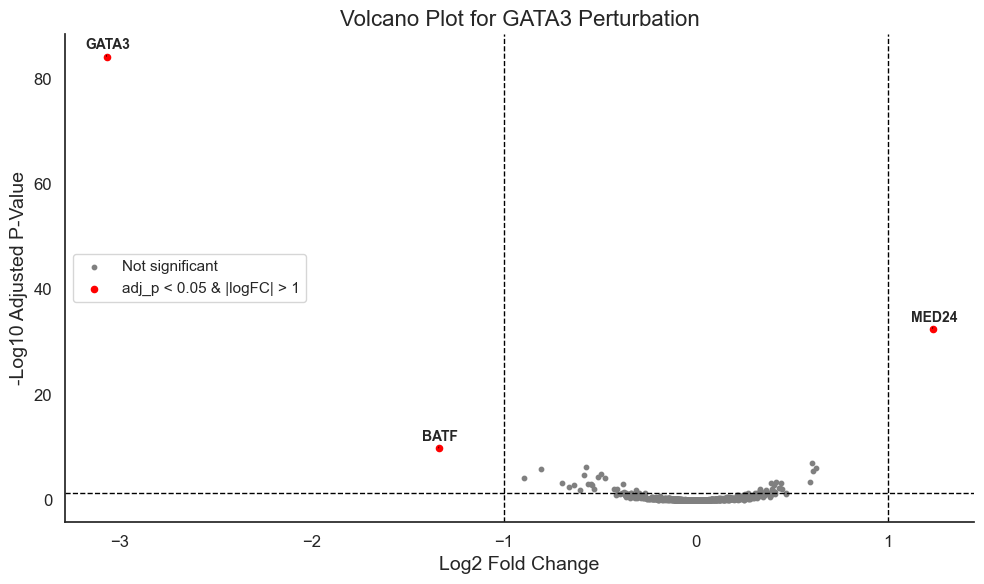

In [26]:
target_gene = 'GATA3'
adj_p_thres = 0.05
log_fc_thres = 1

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

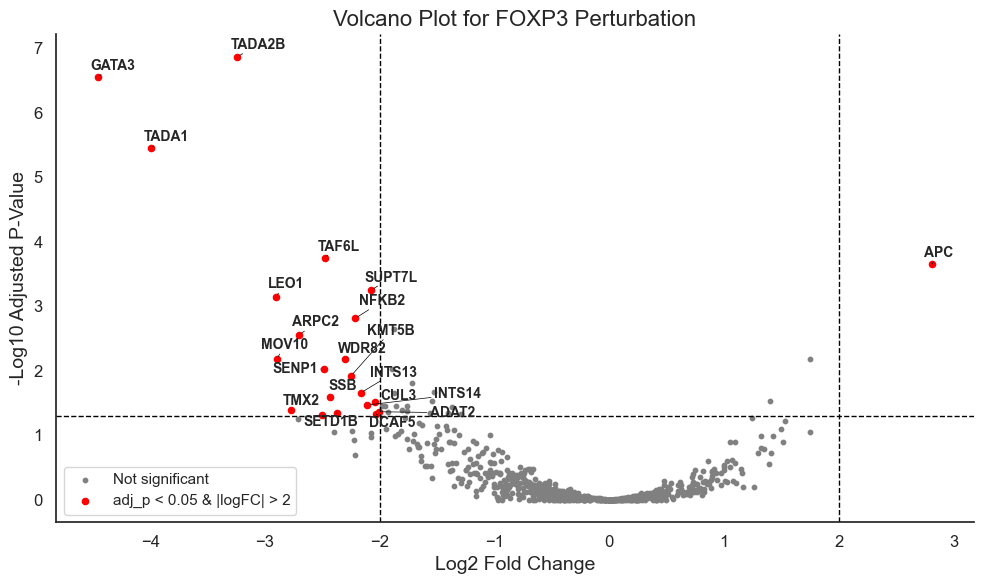

In [17]:
target_gene = 'FOXP3'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

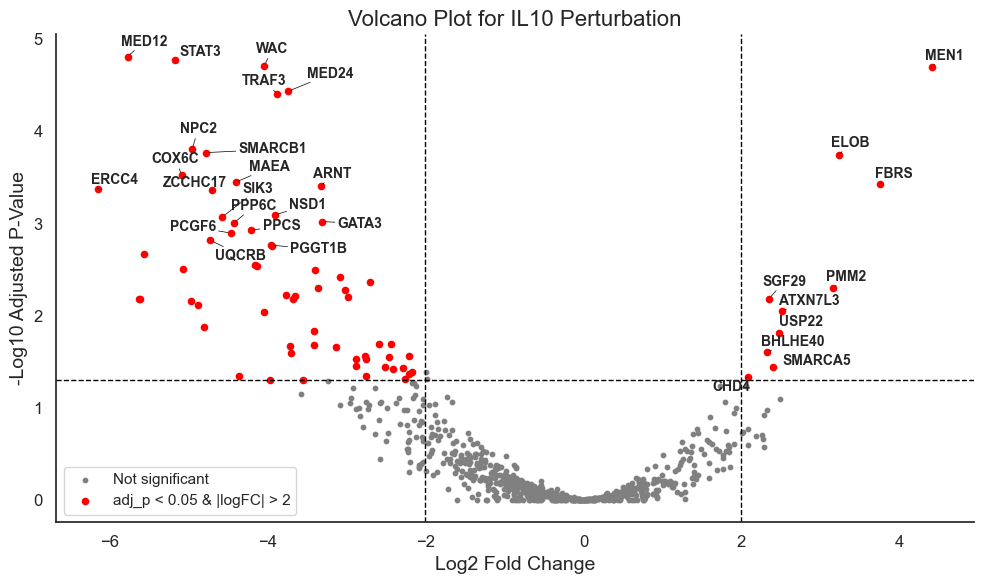

In [5]:
target_gene = 'IL10'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

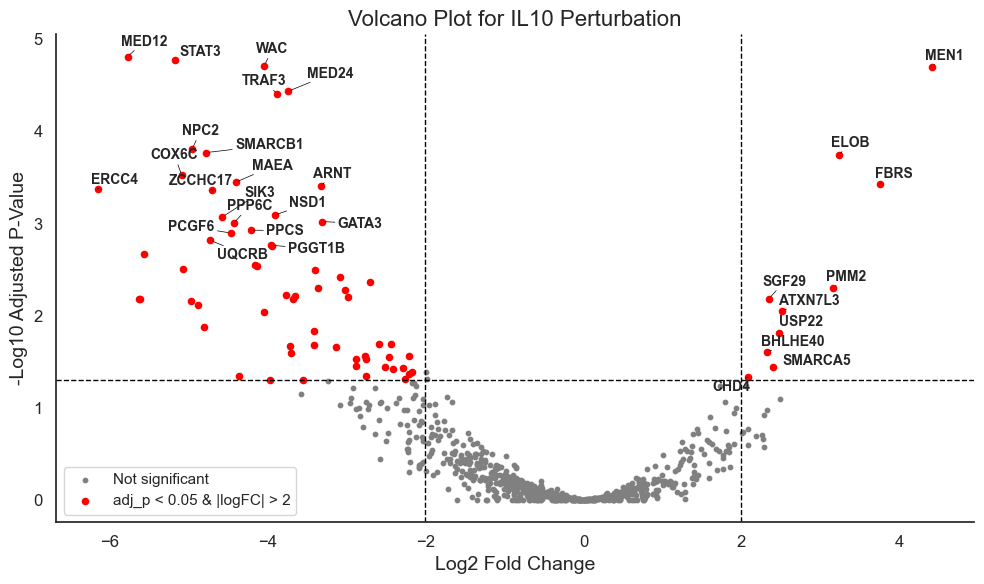

In [57]:
target_gene = 'IL10'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

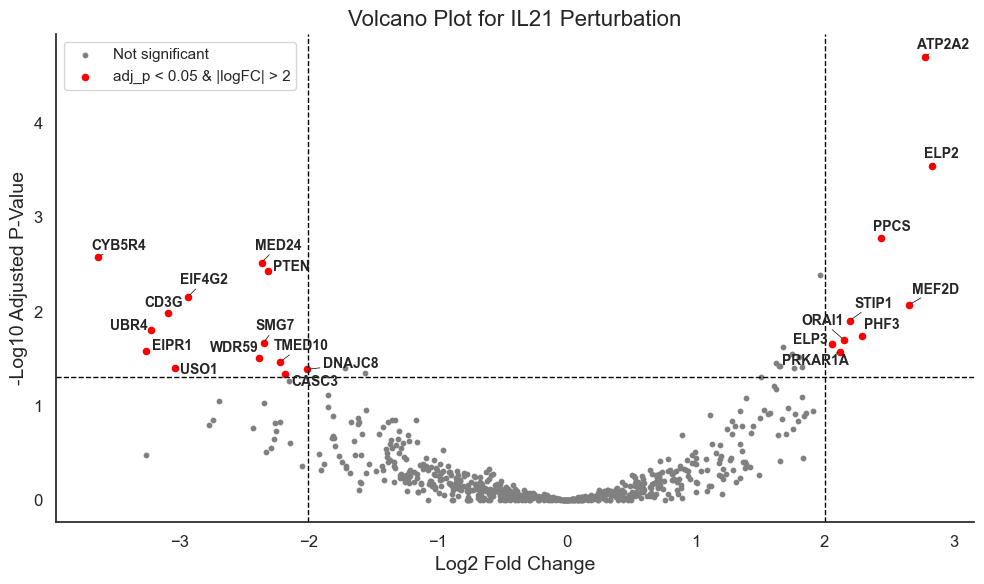

In [58]:
target_gene = 'IL21'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

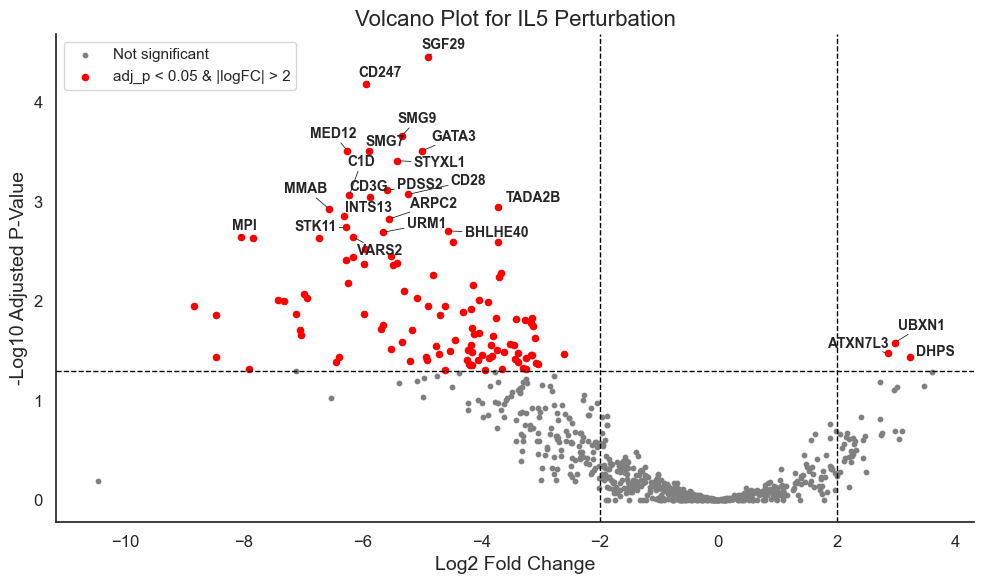

In [59]:
target_gene = 'IL5'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

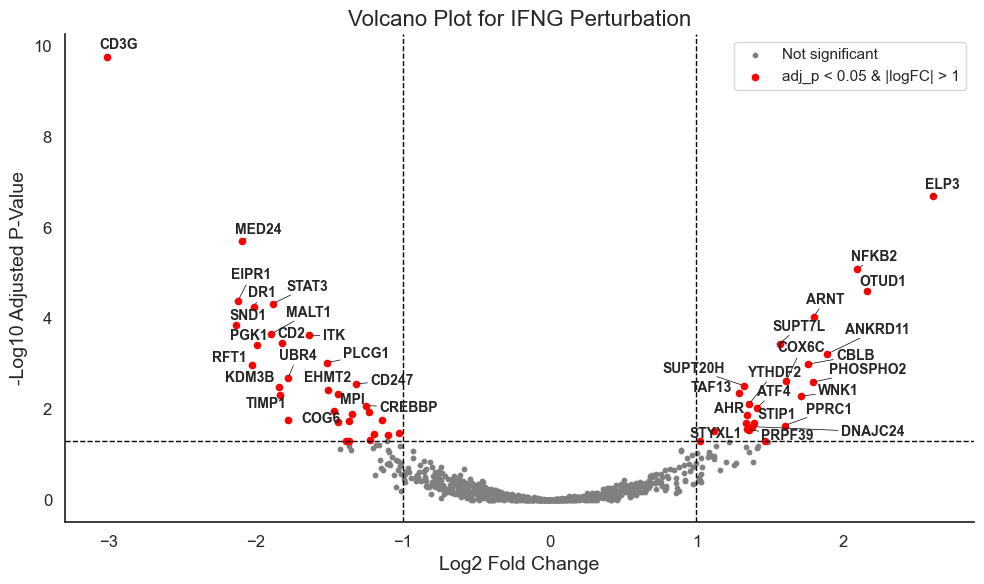

In [61]:
target_gene = 'IFNG'
adj_p_thres = 0.05
log_fc_thres = 1

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

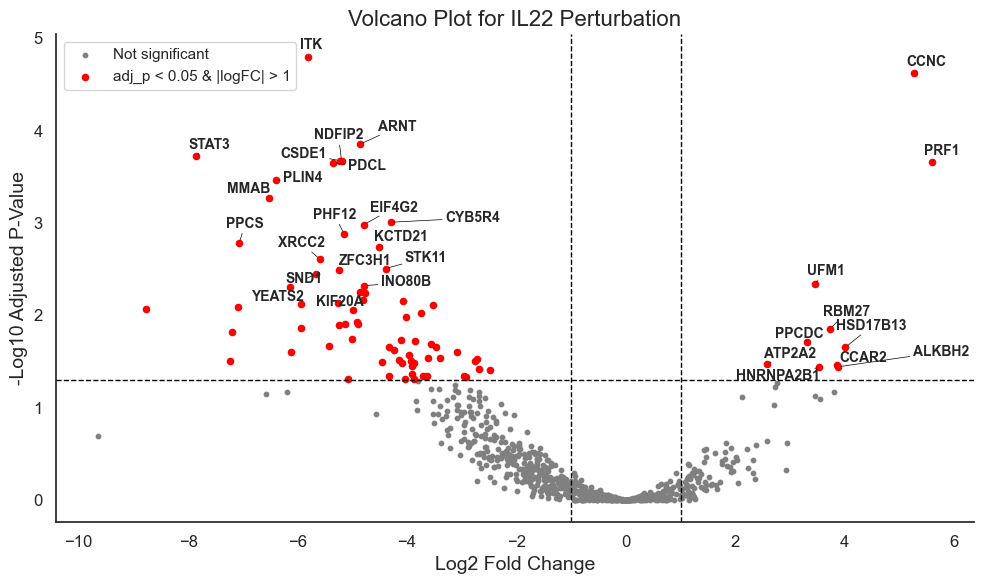

In [179]:
target_gene = 'IL22'
adj_p_thres = 0.05
log_fc_thres = 1

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 5: Get top N significant genes
top_n = 20
left_mask = sig_log_fc < 0
left_idx = np.argsort(-sig_neglogp[left_mask])[:top_n]
left_genes = sig_names[left_mask][left_idx]
right_mask = sig_log_fc > 0
right_idx = np.argsort(-sig_neglogp[right_mask])[:top_n]
right_genes = sig_names[right_mask][right_idx]
annot_genes = np.concatenate([left_genes, right_genes])

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(sig_names == gene)[0][0]
    texts.append(
        plt.text(sig_log_fc[idx], sig_neglogp[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [28]:
annot_genes = ['MEN1', 'ELOB', 'FBRS', 'SGF29', 'ATP2A2', 'MED24', 'GATA3', 'CYB5R4', 'STAT3'] # 'ATXN7L3', 'ELP2', 'PPCS']

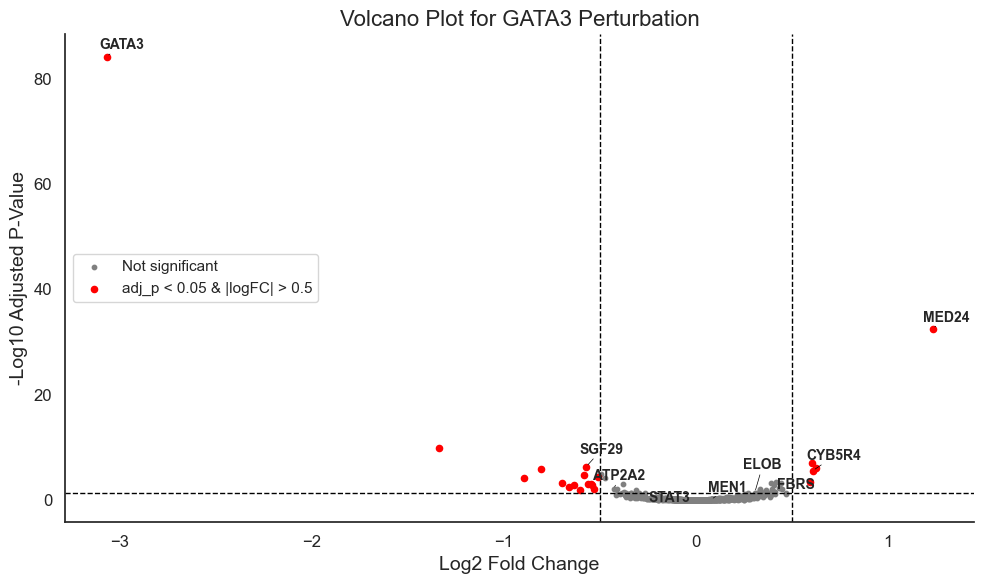

In [33]:
target_gene = 'GATA3'
adj_p_thres = 0.05
log_fc_thres = 0.5

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(gene_names == gene)[0][0]
    texts.append(
        plt.text(log_fc[idx], neg_log10_pval[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

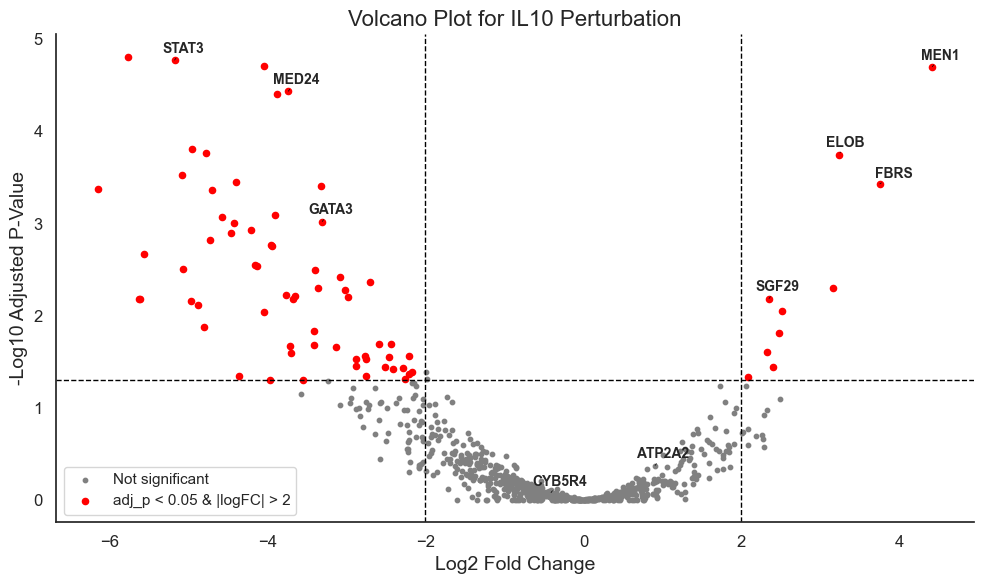

In [181]:
target_gene = 'IL10'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(gene_names == gene)[0][0]
    texts.append(
        plt.text(log_fc[idx], neg_log10_pval[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

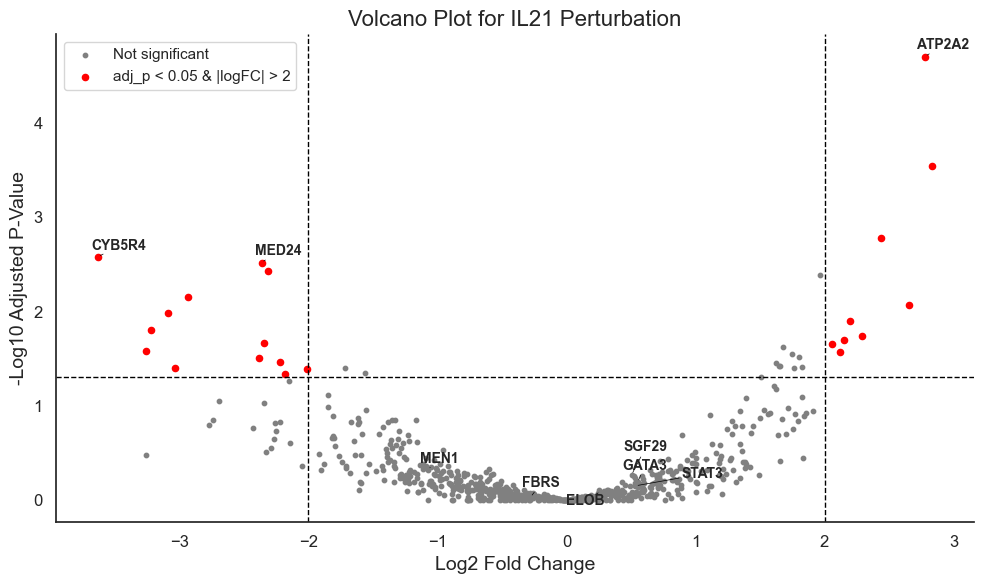

In [183]:
target_gene = 'IL21'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(gene_names == gene)[0][0]
    texts.append(
        plt.text(log_fc[idx], neg_log10_pval[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

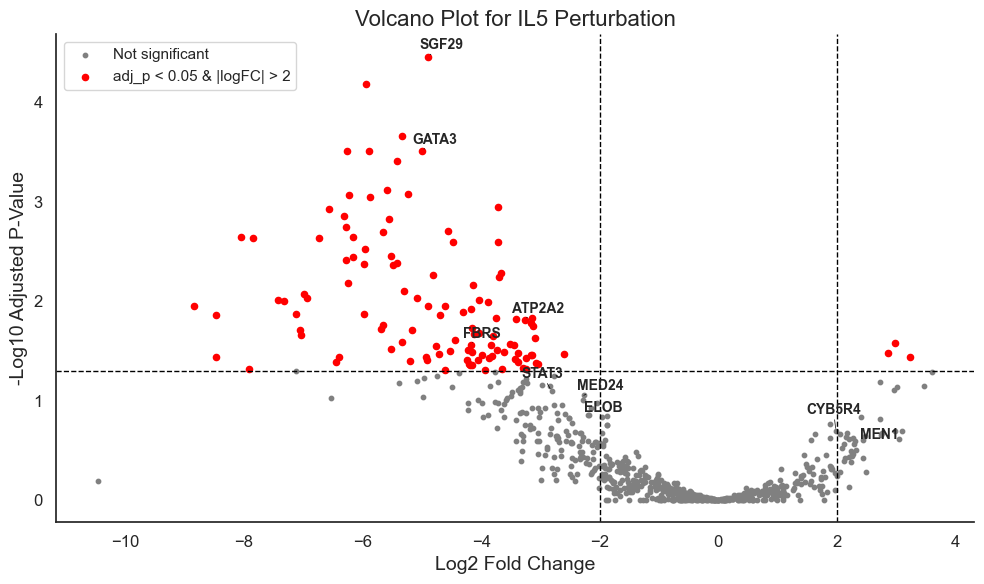

In [184]:
target_gene = 'IL5'
adj_p_thres = 0.05
log_fc_thres = 2

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(gene_names == gene)[0][0]
    texts.append(
        plt.text(log_fc[idx], neg_log10_pval[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

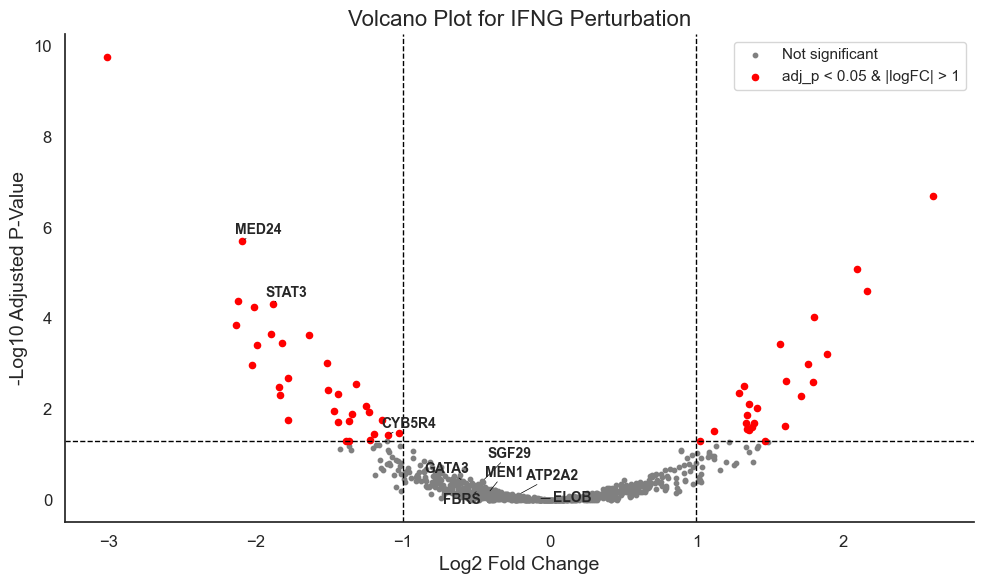

In [185]:
target_gene = 'IFNG'
adj_p_thres = 0.05
log_fc_thres = 1

target_idx = np.where(adata_de.var['gene_name'] == target_gene)[0][0]
log_fc = adata_de[:, target_idx].layers['log_fc'][:, 0]
adj_pvals = adata_de[:, target_idx].layers['adj_p_value'][:, 0]

log_fc = log_fc.toarray().flatten()
adj_pvals = adj_pvals.toarray().flatten()
gene_names = adata_de.obs.loc[:, 'target_contrast_gene_name_corrected'].values
neg_log10_pval = -np.log10(np.clip(adj_pvals, 1e-300, 1))

# Step 4: Significance mask
is_signif = (adj_pvals < adj_p_thres) & (np.abs(log_fc) > log_fc_thres)
sig_log_fc = log_fc[is_signif]
sig_pval = adj_pvals[is_signif]
sig_names = gene_names[is_signif]
sig_neglogp = neg_log10_pval[is_signif]

# Step 6: Plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
plt.scatter(log_fc, neg_log10_pval, c='grey', s=10, label='Not significant')
plt.scatter(log_fc[is_signif], neg_log10_pval[is_signif], c='red', s=20, label=f'adj_p < {adj_p_thres} & |logFC| > {log_fc_thres}')

# Labels
texts = []
for gene in annot_genes:
    idx = np.where(gene_names == gene)[0][0]
    texts.append(
        plt.text(log_fc[idx], neg_log10_pval[idx], gene,
                 fontsize=10, weight='bold', ha='center', va='bottom')
    )

# Adjust to avoid collisions
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Reference lines
plt.axvline(-log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axvline(log_fc_thres, color='black', linestyle='--', linewidth=1)
plt.axhline(-np.log10(adj_p_thres), color='black', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel('Log2 Fold Change', fontsize=14)
plt.ylabel('-Log10 Adjusted P-Value', fontsize=14)
plt.title(f'Volcano Plot for {target_gene} Perturbation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
adata_de.layers['zscore'] = adata_de.layers['log_fc'] / adata_de.layers['lfcSE']
adata_de.layers['zscore'][np.where(adata_de.layers['zscore'] > 50)] = 50
adata_de.X = np.nan_to_num(adata_de.layers['zscore'], 0)

In [19]:
de_summary_stats = pd.read_csv(datadir + '/CD4i_final/DE_results_all_confounders/DE_summary_stats_per_target_corrected.csv', index_col=0)

In [267]:
de_by_guide = pd.read_csv('results/DE_by_guide.correlation_results.csv', index_col=0)

In [268]:
de_by_guide

,target,correlation,correlation_ceiling,n_signif,culture_condition
0,A2M,-0.466086,NaN,10,Rest
1,ABCC1,0.084480,NaN,84,Rest
2,ABHD12,0.490760,0.628502,360,Rest
3,ABHD13,-0.301527,0.527995,507,Rest
4,ABHD14A,0.958795,0.943289,5,Rest
...,...,...,...,...,...
3047,ZNF655,0.761569,0.481366,20,Stim48hr
3048,ZNF658,0.538926,NaN,14,Stim48hr
3049,ZNF829,0.628259,0.886746,52,Stim48hr
3050,ZNF837,0.565384,0.863103,83,Stim48hr


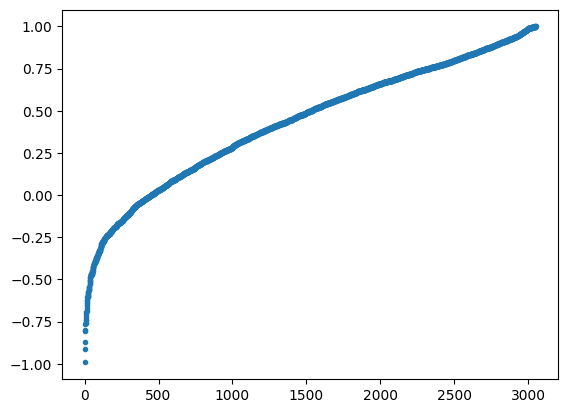

In [269]:
plt.plot(np.sort(de_by_guide['correlation']), '.')

In [271]:
de_by_guide

,target,correlation,correlation_ceiling,n_signif,culture_condition
0,A2M,-0.466086,NaN,10,Rest
1,ABCC1,0.084480,NaN,84,Rest
2,ABHD12,0.490760,0.628502,360,Rest
3,ABHD13,-0.301527,0.527995,507,Rest
4,ABHD14A,0.958795,0.943289,5,Rest
...,...,...,...,...,...
3047,ZNF655,0.761569,0.481366,20,Stim48hr
3048,ZNF658,0.538926,NaN,14,Stim48hr
3049,ZNF829,0.628259,0.886746,52,Stim48hr
3050,ZNF837,0.565384,0.863103,83,Stim48hr


In [272]:
de_by_guide[(de_by_guide.culture_condition=='Stim8hr')&(de_by_guide.target.isin(regulators))]

,target,correlation,correlation_ceiling,n_signif,culture_condition
1022,ATP2A2,0.649677,0.844653,2737,Stim8hr
1086,CCNC,0.260627,NaN,595,Stim8hr
1169,CYB5R4,0.749643,0.882319,875,Stim8hr
1244,ELOB,0.411224,NaN,1968,Stim8hr
1308,GATA3,0.801548,0.890923,236,Stim8hr
1498,MEN1,0.622406,0.799207,567,Stim8hr
1715,PTPN2,0.863937,0.903351,11,Stim8hr
1796,SFXN1,0.266204,0.560394,92,Stim8hr


In [243]:
adata_pb.obs[(adata_pb.obs.perturbed_gene_name=='ARRDC4')&(adata_pb.obs.culture_condition=='Stim8hr')]

,10xrun_id,cell_sample_id,donor_id,culture_condition,guide_id,perturbed_gene_name,perturbed_gene_id,guide_type,n_cells,total_counts,...,keep_effective_guides,keep_total_counts,keep_for_DE,keep_test_genes,log10_n_cells,perturbed_gene_id_corrected,perturbed_gene_name_corrected,contrast_condition,gene_condition,guide_id_condition
CD4i_R2_D4_Stim8hr_ARRDC4-1,CD4i_R2,CD4i_R2_D4_Stim8hr,CE0006864,Stim8hr,ARRDC4-1,ARRDC4,ENSG00000140450,targeting,27.0,227442.0,...,True,True,True,True,1.431364,ENSG00000140450,ARRDC4,ENSG00000140450_Stim8hr,ARRDC4_Stim8hr,ARRDC4-1_Stim8hr
CD4i_R1_D1_Stim8hr_ARRDC4-1,CD4i_R1,CD4i_R1_D1_Stim8hr,CE0008162,Stim8hr,ARRDC4-1,ARRDC4,ENSG00000140450,targeting,15.0,214510.0,...,True,True,True,True,1.176091,ENSG00000140450,ARRDC4,ENSG00000140450_Stim8hr,ARRDC4_Stim8hr,ARRDC4-1_Stim8hr
CD4i_R1_D2_Stim8hr_ARRDC4-1,CD4i_R1,CD4i_R1_D2_Stim8hr,CE0010866,Stim8hr,ARRDC4-1,ARRDC4,ENSG00000140450,targeting,38.0,489360.0,...,True,True,True,True,1.579784,ENSG00000140450,ARRDC4,ENSG00000140450_Stim8hr,ARRDC4_Stim8hr,ARRDC4-1_Stim8hr
CD4i_R2_D3_Stim8hr_ARRDC4-1,CD4i_R2,CD4i_R2_D3_Stim8hr,CE0008678,Stim8hr,ARRDC4-1,ARRDC4,ENSG00000140450,targeting,25.0,188184.0,...,True,True,True,True,1.397940,ENSG00000140450,ARRDC4,ENSG00000140450_Stim8hr,ARRDC4_Stim8hr,ARRDC4-1_Stim8hr


In [235]:
regulators = ['TBX21', 'GATA3', 'CFAP298', 'SORL1', 'PTPN2', 'POLE3', 'MEN1', 'ARRDC4', 'CYB5R4', 'SFXN1', 'ELOB', 'ZNF74', 'ATP2A2', 'CCNC', 'TMED9']
target_genes = ['IFNG', 'IL5', 'IL13', 'IL10', 'IL21', 'IL22']

In [27]:
summary_df = pd.DataFrame()
for target_gene in target_genes:
    df = pd.DataFrame({'zscore_'+target_gene:adata_de[(adata_de.obs.target_contrast_gene_name_corrected.isin(regulators))&(adata_de.obs.culture_condition=='Stim8hr'),adata_de.var.gene_name==target_gene].layers['zscore'][:,0],
                      'padj_'+target_gene:adata_de[(adata_de.obs.target_contrast_gene_name_corrected.isin(regulators))&(adata_de.obs.culture_condition=='Stim8hr'),adata_de.var.gene_name==target_gene].layers['adj_p_value'][:,0],},
                      index=adata_de[(adata_de.obs.target_contrast_gene_name_corrected.isin(regulators))&(adata_de.obs.culture_condition=='Stim8hr')].obs.target_contrast_gene_name_corrected.values)
    summary_df = pd.merge(summary_df, df, left_index=True, right_index=True, how='outer')

zscore_columns = ['zscore_'+target_gene for target_gene in target_genes]
padj_columns = ['padj_'+target_gene for target_gene in target_genes]

summary_df[zscore_columns] = summary_df[zscore_columns].fillna(0)
summary_df[padj_columns] = summary_df[padj_columns].fillna(1)
summary_df['n_total_de_genes'] = de_summary_stats[de_summary_stats.condition=='Stim8hr'].set_index('target_name').loc[regulators].n_total_de_genes

In [83]:
summary_df.loc[['TBX21','GATA3','CFAP298','SORL1','PTPN2','POLE3','MEN1',
                'ARRDC4','CYB5R4','SFXN1','ELOB','ZNF74','ATP2A2','CCNC','TMED9'], 'IL10_flowlfc'] = np.log([1.338578772,0.732935726,0.740952696,0.499161966,
                                                                                                   1.064658911,0.999858164,9.525708406,7.856723525,
                                                                                                   0.892866815,0.733481197,4.908243286,0.708438587,
                                                                                                   0.600150405,0.462031921,1.211428939])

In [84]:
annotations = summary_df[['zscore_IL10', 'IL10_flowlfc']].astype(str)
for i in range(len(df)):
    if summary_df['padj_IL10'].iloc[i] < 0.05:
        annotations.iloc[i, 0] = f"{summary_df['padj_IL10'].iloc[i]:.2e}"
        annotations.iloc[i, 1] = f""
    else:
        annotations.iloc[i, 0] = f""
        annotations.iloc[i, 1] = f""

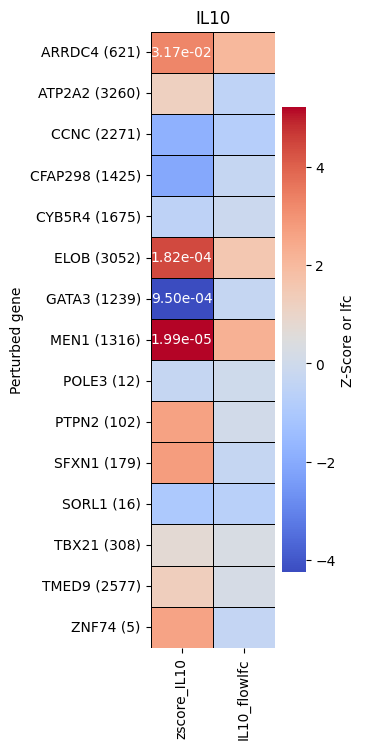

In [85]:
# Plot the heatmap
plt.figure(figsize=(2, 8))
sns.heatmap(
    summary_df[['zscore_IL10', 'IL10_flowlfc']],
    annot=annotations,
    fmt="",
    cmap='coolwarm',
    cbar_kws={'label': 'Z-Score or lfc'},
    linewidths=0.5,
    linecolor='black',
    yticklabels=[gene+f' ({nde})' for gene, nde in zip(summary_df.index,summary_df.n_total_de_genes)]
    #vmin=-6,
    #vmax=6
)
plt.title('IL10')
plt.ylabel('Perturbed gene')
plt.yticks(rotation=0)
plt.show()

In [86]:
summary_df.loc[['TBX21','GATA3','CFAP298','SORL1','PTPN2','POLE3','MEN1',
                'ARRDC4','CYB5R4','SFXN1','ELOB','ZNF74','ATP2A2','CCNC','TMED9'], 'IL21_flowlfc'] = np.log([0.751053494, 1.287291462, 0.57247612, 
                                                                                                             0.713610533, 1.130675848, 1.024454834, 
                                                                                                             0.569606725, 0.548319605, 0.065792774,
                                                                                                             0.762160156, 1.418299496, 0.884571318,
                                                                                                             2.450941999, 1.57003599, 0.789861209])

In [87]:
annotations = summary_df[['zscore_IL21', 'IL21_flowlfc']].astype(str)
for i in range(len(df)):
    if summary_df['padj_IL21'].iloc[i] < 0.05:
        annotations.iloc[i, 0] = f"{summary_df['padj_IL21'].iloc[i]:.2e}"
        annotations.iloc[i, 1] = f""
    else:
        annotations.iloc[i, 0] = f""
        annotations.iloc[i, 1] = f""

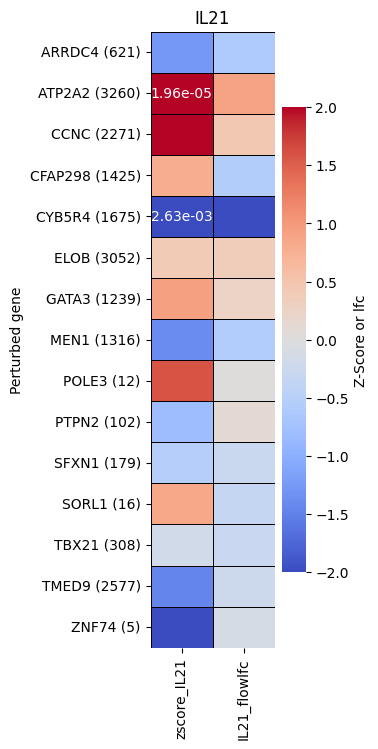

In [88]:
# Plot the heatmap
plt.figure(figsize=(2, 8))
sns.heatmap(
    summary_df[['zscore_IL21', 'IL21_flowlfc']],
    annot=annotations,
    fmt="",
    cmap='coolwarm',
    cbar_kws={'label': 'Z-Score or lfc'},
    linewidths=0.5,
    linecolor='black',
    yticklabels=[gene+f' ({nde})' for gene, nde in zip(summary_df.index,summary_df.n_total_de_genes)],
    vmin=-2,
    vmax=2
)
plt.title('IL21')
plt.ylabel('Perturbed gene')
plt.yticks(rotation=0)
plt.show()

In [89]:
summary_df.loc[['TBX21','GATA3','CFAP298','SORL1','PTPN2','POLE3','MEN1',
                'ARRDC4','CYB5R4','SFXN1','ELOB','ZNF74','ATP2A2','CCNC','TMED9'], 'IL5_flowlfc'] = np.log([0.848821379, 0.059609652, 0.635878159, 
                                                                                                            0.87523534, 0.856516986, 1.253283209, 
                                                                                                            2.033276813, 2.118914094, 0.243517811, 
                                                                                                            0.604583037, 2.556027901, 0.968181088, 
                                                                                                            0.907855722, 1.51488416, 1.090228756])

In [90]:
annotations = summary_df[['zscore_IL5', 'IL5_flowlfc']].astype(str)
for i in range(len(df)):
    if summary_df['padj_IL5'].iloc[i] < 0.05:
        annotations.iloc[i, 0] = f"{summary_df['padj_IL5'].iloc[i]:.2e}"
        annotations.iloc[i, 1] = f""
    else:
        annotations.iloc[i, 0] = f""
        annotations.iloc[i, 1] = f""

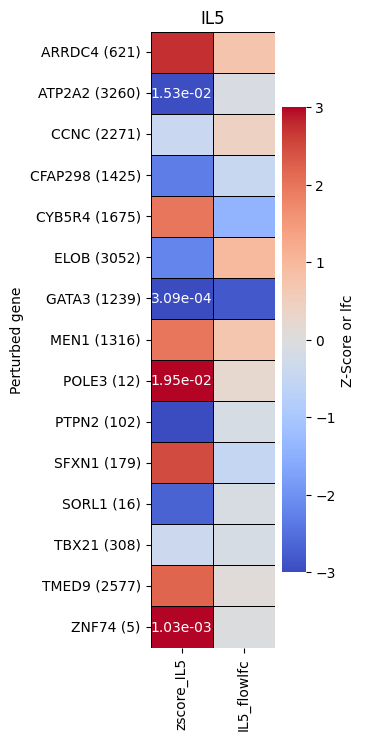

In [91]:
# Plot the heatmap
plt.figure(figsize=(2, 8))
sns.heatmap(
    summary_df[['zscore_IL5', 'IL5_flowlfc']],
    annot=annotations,
    fmt="",
    cmap='coolwarm',
    cbar_kws={'label': 'Z-Score or lfc'},
    linewidths=0.5,
    linecolor='black',
    yticklabels=[gene+f' ({nde})' for gene, nde in zip(summary_df.index,summary_df.n_total_de_genes)],
    vmin=-3,
    vmax=3
)
plt.title('IL5')
plt.ylabel('Perturbed gene')
plt.yticks(rotation=0)
plt.show()

In [92]:
summary_df.loc[['TBX21','GATA3','CFAP298','SORL1','PTPN2','POLE3','MEN1',
                'ARRDC4','CYB5R4','SFXN1','ELOB','ZNF74','ATP2A2','CCNC','TMED9'], 'IFNG_flowlfc'] = np.log([0.236682951,1.115685095,0.707111303,
                                                                                                             0.808116441,1.340527288,1.066418252,
                                                                                                             1.625631301,1.35879521,0.330350345,
                                                                                                             0.829940691,1.253849169,0.877373787,
                                                                                                             1.049694857,1.373313557,1.652605838])

In [93]:
annotations = summary_df[['zscore_IFNG', 'IFNG_flowlfc']].astype(str)
for i in range(len(df)):
    if summary_df['padj_IFNG'].iloc[i] < 0.05:
        annotations.iloc[i, 0] = f"{summary_df['padj_IFNG'].iloc[i]:.2e}"
        annotations.iloc[i, 1] = f""
    else:
        annotations.iloc[i, 0] = f""
        annotations.iloc[i, 1] = f""

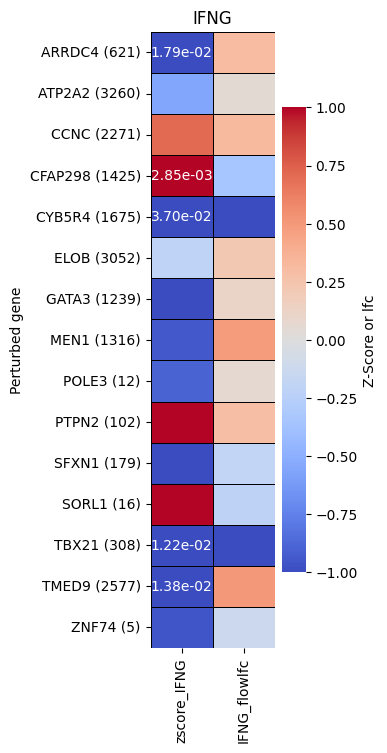

In [95]:
# Plot the heatmap
plt.figure(figsize=(2, 8))
sns.heatmap(
    summary_df[['zscore_IFNG', 'IFNG_flowlfc']],
    annot=annotations,
    fmt="",
    cmap='coolwarm',
    cbar_kws={'label': 'Z-Score or lfc'},
    linewidths=0.5,
    linecolor='black',
    yticklabels=[gene+f' ({nde})' for gene, nde in zip(summary_df.index,summary_df.n_total_de_genes)],
    vmin=-1,
    vmax=1
)
plt.title('IFNG')
plt.ylabel('Perturbed gene')
plt.yticks(rotation=0)
plt.show()